<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Tarea4/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicios: Álgebra Lineal: 1,2,3,4,5,6,8,10,12,13,14

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

**2.** Implemente el algoritmo de Gaus-Seidel para resolver el sistema de ecuaciones visto en
clase.


In [3]:
A = np.array([[3.,-1.,-1.],[-1.,3.,1.],[2.,1.,4.]])
A

array([[ 3., -1., -1.],
       [-1.,  3.,  1.],
       [ 2.,  1.,  4.]])

In [4]:
b = np.array([1.,3.,7.])
b

array([1., 3., 7.])

In [5]:
def GaussSeidel(A,b,x0, itmax = 100, tolerancia = 1e-16):

  x = x0.copy()

  for it in range(itmax):

    # Hacemos una copia del vector x
    x_new = np.copy(x)

    for i in range(A.shape[0]):

      # Contabilizamos la suma del iterador
      Suma = 0.
      for j in range(A.shape[1]):
        if i != j:
          Suma += A[i,j]*x_new[j]
          # La diferencia radica en que ahora la suma es
          # calcula usando x_new recien actualizado
          x_new[i] = (b[i] - Suma)/A[i,i]

    # Criterio de convergencia
    if np.linalg.norm( np.dot(A,x_new)-b) < tolerancia:
      break

    x = np.copy(x_new)

  print(it)

  return x, it

In [6]:
x0 = np.array([0.,0.,0.])
x,_ = GaussSeidel(A,b,x0)
print(x)

25
[1. 1. 1.]


**3**  En Python, implemente una clase para solucionar sistemas lineales. El constructor de clase deber recibir la matriz y el vector independiente.  El primer método de clase resuelve el sistema usando el método de Jacobi, y el segundo método resuelve el sistema usando el método de Gauss-Seidel.  En la pantalla debe aparecer el número de iteraciones necesarias para resolver el problema.

In [7]:
import numpy as np

class SistemaLineal:
    def __init__(self, a, b):
        self.a = np.array(a, dtype=np.double)
        self.b = np.array(b, dtype=np.double)
        self.n = len(b)

    def metodo_jacobi(self, tol=1e-6, max_ite=1000):
        x = np.zeros_like(self.b, dtype=np.double)
        for k in range(max_ite):
            x_nuevo = np.zeros_like(self.b, dtype=np.double)
            for i in range(self.n):
                s = 0
                for j in range(self.n):
                    if i != j:
                        s += self.a[i, j] * x[j]
                x_nuevo[i] = (self.b[i] - s) / self.a[i, i]
            if np.linalg.norm(x - x_nuevo, ord=np.inf) < tol:
                print(f'El método de Jacobi convergió en {k + 1} iteraciones')
                return x_nuevo
            x = x_nuevo
        print('El método de Jacobi no convergió')
        return None

    def metodo_gauss_seidel(self, tol=1e-6, max_ite=1000):
        x = np.zeros_like(self.b, dtype=np.double)
        for k in range(max_ite):
            x_antiguo = x.copy()
            for i in range(self.n):
                s = 0
                for j in range(self.n):
                    if i != j:
                        s += self.a[i, j] * x[j]
                x[i] = (self.b[i] - s) / self.a[i, i]
            if np.linalg.norm(x - x_antiguo, ord=np.inf) < tol:
                print(f"El método de Gauss-Seidel convergió en {k + 1} iteraciones.")
                return x
        print("El método de Gauss-Seidel no convergió.")
        return None

# Ejemplo de uso
a = np.array([[10, 2, 1], [1, 10, 2], [2, 3, 10]])
b = np.array([7, 8, 9])

sistema = SistemaLineal(a, b)
x_jacobi = sistema.metodo_jacobi()
x_gauss_seidel = sistema.metodo_gauss_seidel()

print("Solución con Jacobi:", x_jacobi)
print("Solución con Gauss-Seidel:", x_gauss_seidel)


El método de Jacobi convergió en 15 iteraciones
El método de Gauss-Seidel convergió en 8 iteraciones.
Solución con Jacobi: [0.5137213  0.62678388 0.60922081]
Solución con Gauss-Seidel: [0.51372118 0.62678376 0.60922063]


**4.** Implemente un algoritmo que realice la multiplicación de dos matrices. Use el algoritmo para calcular:


$\mathbf{AB}=\begin{pmatrix}
1 & 0 & 0\\
5 & 1 & 0\\
-2 & 3 & 1
\end{pmatrix}
\begin{pmatrix}
4 & -2 & 1\\
0 & 3 & 7\\
0 & 0 & -2
\end{pmatrix}$

In [8]:
A=np.array([[1.,0.,0.],[5.,1.,0.],[-2.,3.,1.]])
A

array([[ 1.,  0.,  0.],
       [ 5.,  1.,  0.],
       [-2.,  3.,  1.]])

In [9]:
B=np.array([[4.,-2.,1.],[0.,3.,7.],[0.,0.,-2.]])
B

array([[ 4., -2.,  1.],
       [ 0.,  3.,  7.],
       [ 0.,  0., -2.]])

In [10]:
def MultiplicarMatrices(A,B):
  AB=np.zeros((3,3))
  if len(A[0]) == len(B):
    for i in range(len(A)):
      for j in range(len(B[0])):
        for k in range(len(B)):
          AB[i][j] += A[i][k] * B[k][j]
  else:
    print("Las matrices no se pueden multiplicar")
  return AB
MultiplicarMatrices(A,B)

array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 17.]])

**8**  Implemente la descomposición LU para factorizar la siguiente matriz $\mathbf{A} = L \cdot U$

$\mathbf{A}=\begin{pmatrix}
4 & -2 & 1\\
20 & -7 & 12\\
-8 & 13 & 17
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 0\\
5 & 1 & 0\\
-2 & 3 & 1
\end{pmatrix} \cdot
\begin{pmatrix}
4 & -2 & 1\\
0 & 3 & 7\\
0 & 0 & -2
\end{pmatrix}$

In [11]:
def descomposicion_lu(A):
    n = len(A)
    L = np.zeros((n, n))
    U =  np.copy(A).astype(np.float64)

    for i in range(n):
        L[i, i] = 1

    for k in range(n - 1):
        for i in range(k + 1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, :] -= L[i, k] * U[k, :]

    return L, U

A = np.array([[4, -2, 1], [20, -7, 12], [-8, 13, 17]])

L, U = descomposicion_lu(A)

print("Matriz L:")
print(L)
print("Matriz U:")
print(U)

Matriz L:
[[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]]
Matriz U:
[[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


In [12]:
def multiplicacion_matrices(L, U):
    filas_L, columnas_L = L.shape
    filas_U, columnas_U = U.shape
    resultado = np.zeros((filas_L, columnas_U))
    if columnas_L != filas_U:
        raise ValueError("Las dimensiones de las matrices no son compatibles para la multiplicación.")
    for i in range(filas_L):
        for j in range(columnas_U):
            suma = 0
            for k in range(columnas_L):
                suma += L[i, k] * U[k, j]
            resultado[i, j] = suma
    return resultado
L = np.array([[1, 0, 0],
              [5, 1, 0],
              [-2, 3, 1]])

U = np.array([[4, -2, 1],
              [0, 3, 7],
              [0, 0, -2]])
multiplicacion_matrices(L, U)


array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 17.]])

10. Método de Jacobi: diagonalizacioón de matrices simétricas.
Cuando la matriz es simétrica $a_{ij} = a_{ji}$, es posible encontrar todos los valores y vectores propios mediante la transformación de la matriz $\mathbf{A}$ usando matrices de rotación. En particular, una rotación alrededor del eje $z$ está dada por:

$\mathbf{R(\theta)}=\begin{pmatrix}
cos\theta & -sin\theta & 0\\
sin\theta & cos\theta & 0\\
0 & 0 & 1
\end{pmatrix}
$

La rotación de un ángulo $\theta$ muy particular diagonaliza iterativamente a la matriz $\mathbf{A}$.

$\theta=
 \left\{ \begin{array}{lcc} \pi/4 & si & a_{ii} =a_{jj}  \\ \\ \frac{1}{2}Arctan(\frac{2 a_{ij}}{a_{ii}-a_{jj}}) & si & a_{ii} \neq a_{jj} \\ \end{array} \right.$

 donde $i,j$ es la posición del elemento más grande fuera de la diagonal. Investigue en la literatura el algoritmo de Jacobi para diagonalizar matrices simétricas.


 *(a)* Implemente el método de Jacobi para encontrar los valores y vectores propios de:

$\mathbf{A}=\begin{pmatrix}
4 & 1 & 1\\
1 & 3 & 2\\
1 & 2 & 5
\end{pmatrix}
$

*(b)* Compare con el resultado que se obtiene en Numpy: np.linalg.eig(A)

In [13]:
A=np.array([[4.,1.,1.],[1.,3.,2.],[1.,2.,5.]])
A

array([[4., 1., 1.],
       [1., 3., 2.],
       [1., 2., 5.]])

In [23]:
import numpy as np

def Metodo_Jacobi(A, tol=1e-10, max_iter=1000):
    n = A.shape[0]
    V = np.eye(n)

    def maximo(A):
        n = A.shape[0]
        max_val = 0
        p = 0
        q = 1
        for i in range(n):
            for j in range(i+1, n):
                if abs(A[i,j]) > max_val:
                    max_val = abs(A[i,j])
                    p = i
                    q = j
        return p, q, max_val

    for it in range(max_iter):
        i, j, max_val = maximo(A)

        if max_val < tol:
            break

        if A[i, i] == A[j, j]:
            theta = np.pi / 4
        else:
            theta = 0.5 * np.arctan(2 * A[i, j] / (A[i, i] - A[j, j]))


        R = np.eye(n)
        R[i, i] = np.cos(theta)
        R[j, j] = np.cos(theta)
        R[i, j] = -np.sin(theta)
        R[j, i] = np.sin(theta)


        A = R.T @ A @ R
        V = V @ R


    eigenvalues = np.diag(A)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]

    return eigenvalues, V


def normalize_sign(vectors):
    for i in range(vectors.shape[1]):
        if vectors[0, i] < 0:
            vectors[:, i] *= -1
    return vectors


eigenvalues, eigenvectors = Metodo_Jacobi(A)
##Parte b) numpy.
eigenvalues_b, eigenvectors_b = np.linalg.eig(A)

print("\tAntes de normalizar:")
print("Valores propios:\n", eigenvalues)
print("Vectores propios:\n", eigenvectors)
print("\nValores propios (parte b):\n", eigenvalues_b)
print("Vectores propios (parte b):\n", eigenvectors_b,"\n")


print("\n\tDespues de normalizar:")

eigenvectors = normalize_sign(eigenvectors)

print("Valores propios:\n", eigenvalues)
print("Vectores propios:\n", eigenvectors)

print("\nValores propios (parte b):\n", eigenvalues_b)
print("Vectores propios (parte b):\n", eigenvectors_b)

	Antes de normalizar:
Valores propios:
 [6.89510652 3.39729507 1.70759841]
Vectores propios:
 [[ 0.43170413  0.88573564 -0.17059871]
 [ 0.49725362 -0.07589338  0.86427949]
 [ 0.75257583 -0.45794385 -0.47319874]]

Valores propios (parte b):
 [6.89510652 3.39729507 1.70759841]
Vectores propios (parte b):
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]] 


	Despues de normalizar:
Valores propios:
 [6.89510652 3.39729507 1.70759841]
Vectores propios:
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]

Valores propios (parte b):
 [6.89510652 3.39729507 1.70759841]
Vectores propios (parte b):
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


**12** Usando los métodos de Newton-Raphson y descenso del gradiente, encuentre la solución de los siguientes sistemas de ecuaciones no lineales:
$ln (x^2_1+x^2_2)- sin(x_1x_2)=ln(2)+ln(\pi)$,
$e^{x_1-x_2}+cos (x_1x_2)=0$

Use $x^{0}=(2,2)$

$6x_1−2cos(x_2x_3)−1   =   0$,

$9x_2+\sqrt{x^2_1+sin(x_3) + 1.06} + 0.9 =0$,

$60x_3+ 3e^{−x_1x_2}+ 10\pi−3   =   0$.

Use $x^{(0)}$=(0,0,0)


Iteración 10: error = 4.5605e-01
Iteración 20: error = 3.7058e-01
Iteración 30: error = 2.9995e-01
Iteración 40: error = 2.4208e-01
Iteración 50: error = 1.9496e-01
Iteración 60: error = 1.5679e-01
Iteración 70: error = 1.2597e-01
Iteración 80: error = 1.0115e-01
Iteración 90: error = 8.1209e-02
Iteración 100: error = 6.5197e-02
Iteración 110: error = 5.2352e-02
Iteración 120: error = 4.2051e-02
Iteración 130: error = 3.3793e-02
Iteración 140: error = 2.7172e-02
Iteración 150: error = 2.1863e-02
Iteración 160: error = 1.7604e-02
Iteración 170: error = 1.4187e-02
Iteración 180: error = 1.1445e-02
Iteración 190: error = 9.2429e-03
Iteración 200: error = 7.4740e-03
Iteración 210: error = 6.0524e-03
Iteración 220: error = 4.9093e-03
Iteración 230: error = 3.9895e-03
Iteración 240: error = 3.2492e-03
Iteración 250: error = 2.6528e-03
Iteración 260: error = 2.1720e-03
Iteración 270: error = 1.7842e-03
Iteración 280: error = 1.4710e-03
Iteración 290: error = 1.2179e-03
Iteración 300: error = 

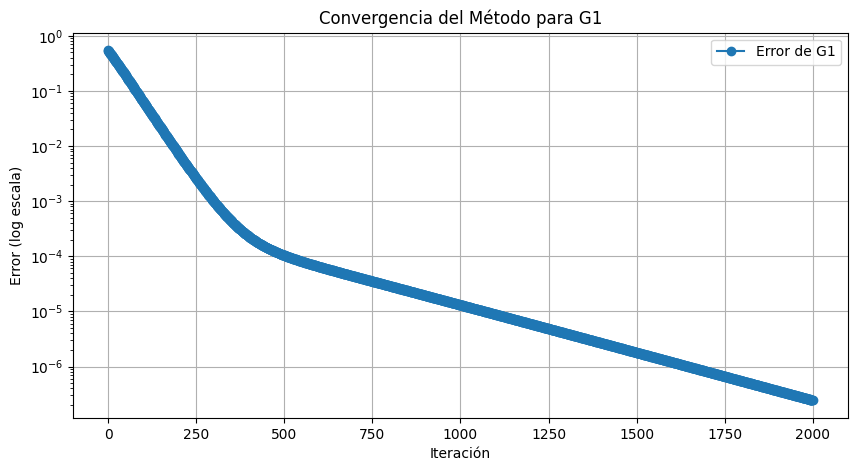

Iteración 10: error = 2.4308e+02
Iteración 20: error = 1.1972e+02
Iteración 30: error = 6.0434e+01
Iteración 40: error = 3.1932e+01
Iteración 50: error = 1.8216e+01
Iteración 60: error = 1.1602e+01
Iteración 70: error = 8.3987e+00
Iteración 80: error = 6.8345e+00
Iteración 90: error = 6.0578e+00
Iteración 100: error = 5.6596e+00
Iteración 110: error = 5.4434e+00
Iteración 120: error = 5.3149e+00
Iteración 130: error = 5.2288e+00
Iteración 140: error = 5.1633e+00
Iteración 150: error = 5.1079e+00
Iteración 160: error = 5.0577e+00
Iteración 170: error = 5.0102e+00
Iteración 180: error = 4.9643e+00
Iteración 190: error = 4.9193e+00
Iteración 200: error = 4.8751e+00
Iteración 210: error = 4.8314e+00
Iteración 220: error = 4.7882e+00
Iteración 230: error = 4.7455e+00
Iteración 240: error = 4.7033e+00
Iteración 250: error = 4.6615e+00
Iteración 260: error = 4.6202e+00
Iteración 270: error = 4.5793e+00
Iteración 280: error = 4.5388e+00
Iteración 290: error = 4.4987e+00
Iteración 300: error = 

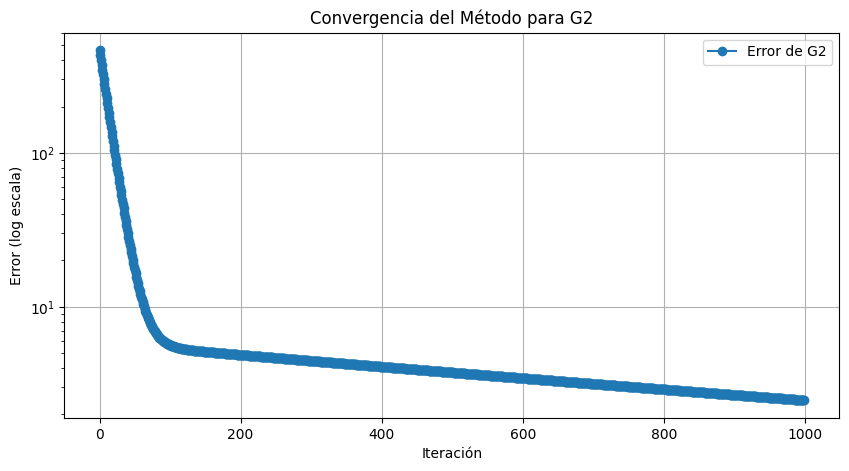

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

G1 = (lambda x, y: np.log(x**2 + y**2) - np.sin(x * y) - np.log(2) - np.log(np.pi),
      lambda x, y: np.exp(x - y) + np.cos(x * y))


G2 = (lambda x, y, z: 6 * x - 2 * np.cos(y * z) - 1,
      lambda x, y, z: 9 * y + np.sqrt(x**2 + np.sin(z) + 1.06) + 0.9,
      lambda x, y, z: 60 * z + 3 * np.exp(-x * y) + 10 * np.pi - 3)

def GetF(G, r):
    n = len(G)
    v = np.zeros(n)
    if n == 3:
        for i in range(n):
            v[i] = G[i](r[0], r[1], r[2])
    else:
        for i in range(n):
            v[i] = G[i](r[0], r[1])
    return v

def Metric(G, r):
    return 0.5 * np.linalg.norm(GetF(G, r))**2

def GetJacobian(G, r, h=1e-3):
    n = len(G)
    J = np.zeros((n, len(r)))

    for i in range(n):
        for j in range(len(r)):
            rf = r.copy()
            rb = r.copy()
            rf[j] += h
            rb[j] -= h

            if len(r) == 3:
                J[i, j] = (G[i](rf[0], rf[1], rf[2]) - G[i](rb[0], rb[1], rb[2])) / (2 * h)
            else:
                J[i, j] = (G[i](rf[0], rf[1]) - G[i](rb[0], rb[1])) / (2 * h)

    return J




def Minimizer(r, G, lr=1e-5, epochs=1000, error=1e-8):
    metric = Metric(G, r)
    it = 0
    metrics = []

    while metric > error and it < epochs:
        J = GetJacobian(G, r)
        F = GetF(G, r)

        gradE = np.dot(J.T, F)
        r = r - lr * gradE

        metric = Metric(G, r)
        metrics.append(metric)

        it += 1
        if it % 10 == 0:
            print(f"Iteración {it}: error = {metric:.4e}")

    if it == epochs:
        print("No convergió en el número máximo de iteraciones.")
    else:
        print(f"Convergió en {it} iteraciones con un error de {metric:.4e}")

    return r, it, metrics

sol1, it1, metrics1 = Minimizer(np.array([2.0, 2.0]), G1, lr=1e-3, epochs=2000)
print("Solución para el primer sistema (G1):", sol1)

plt.figure(figsize=(10, 5))
plt.plot(metrics1, marker='o', label='Error de G1')
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Error (log escala)')
plt.title('Convergencia del Método para G1')
plt.legend()
plt.grid()
plt.show()

sol2, it2, metrics2 = Minimizer(np.array([0.0, 0.0, 0.0]), G2, )
print("Solución para el segundo sistema (G2):", sol2)

plt.figure(figsize=(10, 5))
plt.plot(metrics2, marker='o', label='Error de G2')
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Error (log escala)')
plt.title('Convergencia del Método para G2')
plt.legend()
plt.grid()
plt.show()

**13.** (Jacobiano de cuarto orden) Usando el operador derivada central de orden $O(h^4)$ es posible mejorar la estimación del Jacobiano para funciones vectoriales.

*(a)* Escriba una función que estime el Jacobiano con el operador derivada de orden $O(h^4)$.

*(b)* Estime el Jacobiano de la función del problema anterior (5.68) en el punto $x=(0.5,0.5,0.5)$ con $h=0.01$.

*(c)* Estime el Jacobiano usando la aproximación de orden $O(h^2)$ con $h=0.01$. Para qué valor de $h$, el operador de segundo orden igualará en precisión al operador de cuarto orden; verifique su intuición en el código.

In [16]:
def f(x):
    return np.array([
        6 * x[0] - 2 * np.cos(x[1] * x[2]) - 1,
        9 * x[1] + np.sqrt(x[0]**2 + np.sin(x[2]) + 1.06) + 0.9,
        60 * x[2] + 3 * np.exp(-x[0] * x[1]) + 10 * np.pi - 3
    ])

In [17]:
# a) Jacobiano O(h^4)
def jacobiano_Oh4(f, x, h=0.01):
    n = len(x)
    m = len(f(x))
    J = np.zeros((m, n))

    for i in range(n):
        xh2_pos = x.copy()
        xh1_pos = x.copy()
        xh1_neg = x.copy()
        xh2_neg = x.copy()

        xh2_pos[i] += 2*h
        xh1_pos[i] += h
        xh1_neg[i] -= h
        xh2_neg[i] -= 2*h

        J[:, i] = (-f(xh2_pos) + 8*f(xh1_pos) - 8*f(xh1_neg) + f(xh2_neg)) / (12*h)

    return J

x = np.array([0.5, 0.5, 0.5])
h = 0.01

J_Oh4 = jacobiano_Oh4(f, x, h)
print("Jacobiano O(h^4) en x = (0.5, 0.5, 0.5):\n", J_Oh4)

# c) O(h^2)
def jacobiano_Oh2(f, x, h=0.01):
    n = len(x)
    m = len(f(x))
    J = np.zeros((m, n))

    for i in range(n):
        xh_pos = x.copy()
        xh_neg = x.copy()

        xh_pos[i] += h
        xh_neg[i] -= h


        J[:, i] = (f(xh_pos) - f(xh_neg)) / (2*h)

    return J

J_Oh2 = jacobiano_Oh2(f, x, h)
print("\nJacobiano O(h^2) en x = (0.5, 0.5, 0.5):\n", J_Oh2)
print("No tiene la misma precisión que con el operador de derivada (O(h^4))")

J_Oh2 = jacobiano_Oh2(f, x, h=h*h)
print("\nintuitivamente: la razon entre h^4 y h^2 es h^2, por esto se necesitaría h^2 en h (el paso) para que el jacobiano con (O(h^2)) de igual al de (O(h^4))")
print("\nJacobiano O(h^2) en x = (0.5, 0.5, 0.5), h=(0.01)^2:\n", J_Oh2)
print("Tiene la misma precisión que con el operador de derivada (O(h^4))")

Jacobiano O(h^4) en x = (0.5, 0.5, 0.5):
 [[ 6.          0.24740396  0.24740396]
 [ 0.37377753  9.          0.32802064]
 [-1.16820117 -1.16820117 60.        ]]

Jacobiano O(h^2) en x = (0.5, 0.5, 0.5):
 [[ 6.          0.24740293  0.24740293]
 [ 0.37376854  9.          0.32801836]
 [-1.16820604 -1.16820604 60.        ]]
No tiene la misma precisión que con el operador de derivada (O(h^4))

intuitivamente: la razon entre h^4 y h^2 es h^2, por esto se necesitaría h^2 en h (el paso) para que el jacobiano con (O(h^2)) de igual al de (O(h^4))

Jacobiano O(h^2) en x = (0.5, 0.5, 0.5), h=(0.01)^2:
 [[ 6.          0.24740396  0.24740396]
 [ 0.37377753  9.          0.32802064]
 [-1.16820118 -1.16820118 60.        ]]
Tiene la misma precisión que con el operador de derivada (O(h^4))


**14.** (Group theory, Sympy) El grupo de rotación *SO*(3) (special orthogonal dim 3) decribe las rotaciones en el espacio. Este grupo tiene el siguiente conjunto de generadores:


$\mathbf{J_x}=\begin{pmatrix}
0 & 0 & 0\\
0 & 0 & -1\\
0 & 1 & 0
\end{pmatrix},
\mathbf{J_y}=\begin{pmatrix}
0 & 0 & 1\\
0 & 0 & 0\\
-1 & 0 & 0
\end{pmatrix},
\mathbf{J_z}=\begin{pmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 0 & 0
\end{pmatrix}
$

Verifique que el álgebra de Lie del grupo está dada por

$[J_i,J_j]=ε_{ijk}J_k, \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ i,j=1,2,3.$

donde $[A,B]=AB-BA$ es el conmutator y el símbolo Levi-Civita está definido por:

$ε_{ijk}=
 \left\{ \begin{array}{lcc} +1 & si(i,j,k) & (1,2,3),(2,3,1),(3,1,2) & permutacion\ par  \\ \\ -1 & si(i,j,k) & (3,2,1),(1,3,2),(2,1,3) & permutacion\ impar\\ \\ 0 & de\ otro\ modo & i=j\ \ o\ \ j=k\ \ o\ \ k=i \end{array} \right.$

In [18]:
import sympy as sp

Jx = sp.Matrix([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Jy = sp.Matrix([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
Jz = sp.Matrix([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

def commutator(A, B):
    return A * B - B * A

commutator_Jx_Jy = commutator(Jx, Jy)
commutator_Jy_Jz = commutator(Jy, Jz)
commutator_Jz_Jx = commutator(Jz, Jx)

commutator_Jx_Jy, commutator_Jy_Jz, commutator_Jz_Jx

(Matrix([
 [0, -1, 0],
 [1,  0, 0],
 [0,  0, 0]]),
 Matrix([
 [0, 0,  0],
 [0, 0, -1],
 [0, 1,  0]]),
 Matrix([
 [ 0, 0, 1],
 [ 0, 0, 0],
 [-1, 0, 0]]))

In [19]:
import sympy as sp

Jx = sp.Matrix([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Jy = sp.Matrix([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
Jz = sp.Matrix([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

def commutator(A, B):
    return (A * B) - (B * A)


print("Verificando la estructura de Lie de SO(3)...")


print("Comutador [Jx, Jy] = ")
sp.pprint(commutator(Jx,Jy))
print("Debería ser igual a Jz:")
sp.pprint(Jz)


print("Comutador [Jy, Jz] = ")
sp.pprint(commutator(Jy, Jz))
print("Debería ser igual a Jx:")
sp.pprint(Jx)


print("Comutador [Jz, Jx] = ")
sp.pprint(commutator(Jz, Jx))
print("Debería ser igual a Jy:")
sp.pprint(Jy)

Verificando la estructura de Lie de SO(3)...
Comutador [Jx, Jy] = 
⎡0  -1  0⎤
⎢        ⎥
⎢1  0   0⎥
⎢        ⎥
⎣0  0   0⎦
Debería ser igual a Jz:
⎡0  -1  0⎤
⎢        ⎥
⎢1  0   0⎥
⎢        ⎥
⎣0  0   0⎦
Comutador [Jy, Jz] = 
⎡0  0  0 ⎤
⎢        ⎥
⎢0  0  -1⎥
⎢        ⎥
⎣0  1  0 ⎦
Debería ser igual a Jx:
⎡0  0  0 ⎤
⎢        ⎥
⎢0  0  -1⎥
⎢        ⎥
⎣0  1  0 ⎦
Comutador [Jz, Jx] = 
⎡0   0  1⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣-1  0  0⎦
Debería ser igual a Jy:
⎡0   0  1⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣-1  0  0⎦


In [20]:
print("Comutador [Jx, Jx] = ")
sp.pprint(commutator(Jx, Jx))

print("Comutador [Jy, Jy] = ")
sp.pprint(commutator(Jy, Jy))

print("Comutador [Jz, Jz] = ")
sp.pprint(commutator(Jz, Jz))

Comutador [Jx, Jx] = 
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦
Comutador [Jy, Jy] = 
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦
Comutador [Jz, Jz] = 
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦


In [21]:
def levi_civita(i, j, k):
    if (i, j, k) in [(1, 2, 3), (2, 3, 1), (3, 1, 2)]:
        return 1
    elif (i, j, k) in [(3, 2, 1), (1, 3, 2), (2, 1, 3)]:
        return -1
    else:
        return 0

print("Verificando la estructura de Lie con el símbolo de Levi-Civita...")

for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            if levi_civita(i, j, k) != 0:
                sp.pprint(f"[J{i}, J{j}] = {levi_civita(i, j, k)}*J{k}")
                sp.pprint(commutator([Jx, Jy, Jz][i-1], [Jx, Jy, Jz][j-1]))
                sp.pprint([Jx, Jy, Jz][k-1])

Verificando la estructura de Lie con el símbolo de Levi-Civita...
[J1, J2] = 1*J3
⎡0  -1  0⎤
⎢        ⎥
⎢1  0   0⎥
⎢        ⎥
⎣0  0   0⎦
⎡0  -1  0⎤
⎢        ⎥
⎢1  0   0⎥
⎢        ⎥
⎣0  0   0⎦
[J1, J3] = -1*J2
⎡0  0  -1⎤
⎢        ⎥
⎢0  0  0 ⎥
⎢        ⎥
⎣1  0  0 ⎦
⎡0   0  1⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣-1  0  0⎦
[J2, J1] = -1*J3
⎡0   1  0⎤
⎢        ⎥
⎢-1  0  0⎥
⎢        ⎥
⎣0   0  0⎦
⎡0  -1  0⎤
⎢        ⎥
⎢1  0   0⎥
⎢        ⎥
⎣0  0   0⎦
[J2, J3] = 1*J1
⎡0  0  0 ⎤
⎢        ⎥
⎢0  0  -1⎥
⎢        ⎥
⎣0  1  0 ⎦
⎡0  0  0 ⎤
⎢        ⎥
⎢0  0  -1⎥
⎢        ⎥
⎣0  1  0 ⎦
[J3, J1] = 1*J2
⎡0   0  1⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣-1  0  0⎦
⎡0   0  1⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣-1  0  0⎦
[J3, J2] = -1*J1
⎡0  0   0⎤
⎢        ⎥
⎢0  0   1⎥
⎢        ⎥
⎣0  -1  0⎦
⎡0  0  0 ⎤
⎢        ⎥
⎢0  0  -1⎥
⎢        ⎥
⎣0  1  0 ⎦
